# Проект "Аналитика  сайта Афиша"

Данный проект посвящен анализу данных от сайта Афиша с июня 2017 по конец мая 2018 года с целью оптимизации маркетинговых затрат. Анализ предполагает изучение того  как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент и когда клиент окупается. Исследование планируется проводить на основе логов сервера с данными о посещениях сайта Афиши, данных о заказах за необходимы период и статистики рекламных расходов.
    План работы:
1. [Изучить общую инфомрацию о данных;](#start)
2. [Выполнить предобработку данных:](#1)
    - [проверить типы данных на корректность;](#1)
    - [проверить данные на пропуски и дубликаты](#1)
3. [Провести исследовательский анализ данных, для чего сформировать отчёты и посчитать метрики](#2)
 - по продукту:
    - [Сколько людей пользуются в день, неделю, месяц?](#2)
    - [Сколько сессий в день?](#3)
    - [Сколько длится одна сессия?](#3)
    - [Как часто люди возвращаются?](#4)
 - по продажам:
    - [Когда люди начинают покупать?](#5)
    - [Сколько раз покупают за период?](#5)
    - [Какой средний чек?](#6)
    - [Сколько денег приносят? (LTV)](#7)
 - по маркетингу:
    - [Сколько денег потратили? Всего / на каждый источник / по времени](#8)
    - [Сколько стоило привлечение одного покупателя из каждого источника?](#8)
    - [На сколько окупились расходы? (ROI)](#8)
4. [Выводы и рекомендации о наиболее перспективных источниках/платформах](#9)
       - В работе предполагается выполнить визуализацию посредством графиков и гистограмм, расчет необходимых для анализа метрик.
    Описание данных
 - Таблица visits (лог сервера с информацией о посещениях сайта):
    - Uid — уникальный идентификатор пользователя
    - Device — категория устройства пользователя
    - Start Ts — дата и время начала сессии
    - End Ts — дата и время окончания сессии
    - Source Id — идентификатор рекламного источника, из которого пришел пользователь
 - Таблица orders (информация о заказах):
    - Uid — уникальный id пользователя, который сделал заказ
    - Buy Ts — дата и время заказа
    - Revenue — выручка Яндекс.Афиши с этого заказа
 - Таблица costs (информация о затратах на маркетинг):
    - source_id — идентификатор рекламного источника
    - dt — дата
    - costs — затраты на этот рекламный источник в этот день

Данные содержатся в следующих csv файлах: 
  - /datasets/visits_log.csv  - лог сервера с данными о посещениях сайта Яндекс.Афиши;
  - /datasets/orders_log.csv - выгрузка всех заказов за этот период;
  - /datasets/costs.csv - статистика рекламных расходов.

## 1. Изучение общей информации<a id="start"> </a>

In [1]:
import pandas as pd # <импорт библиотеки pandas>
from matplotlib import pyplot as plt  # <импорт библиотеки matplotlib>
import numpy as np # <импорт библиотеки numpy>
import seaborn as sns# <импорт библиотеки seaborn>
import scipy.stats as st  # <импорт scipy.stats>
from IPython.display import display# <импорт метода display из библиотеки IPython.display для просмотра таблиц>
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
import pylab as pl
init_notebook_mode(connected=True)

Прочитаем файл visits_log

In [2]:
path = 'E:/csv_yandex_afisha/'

In [3]:
visits = pd.read_csv(path + 'visits_log.csv') # <чтение файла с данными с сохранением их в переменной visits>

Посмотрим таблицу visits, выведем ее на экран

In [4]:
display(visits)#<вывод таблицы на экран>

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


Посмотрим общую информацию о таблице visits

In [5]:
visits.info()# <просмотр общей информации о таблице>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


В таблице 359400 строк и 5 столбцов, пропущенные значения отсуствуют, это хорошо. Необходимо откорректировать названия столбцов, и типы данных по столбцам End Ts и Start Ts с object на datetime, поскольку столбцы содержат даты

Посмотрим какие уникальные значения содержит столбец Device, чтоб убедиться, что данные корректны

In [6]:
visits['Device'].unique()

array(['touch', 'desktop'], dtype=object)

Прочитаем файл orders_log

In [7]:
path_1 = 'E:/csv_yandex_afisha/'

In [8]:
orders = pd.read_csv(path_1  + 'orders_log.csv') # <чтение файла с данными с сохранением их в переменной orders>

Посмотрим таблицу orders, выведем ее на экран

In [9]:
display(orders)#<вывод таблицы на экран>

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


Посмотрим общую информацию о таблице

In [10]:
orders.info()# <просмотр общей информации о таблице>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


В таблице 50415 строк и 3 столбцов, пропущенные значения отсуствуют. Необходимо откорректировать названия столбца, и тип данных Buy Ts с object на datetime, поскольку столбец содержит дату

Прочитаем файл costs

In [11]:
path_2 = 'E:/csv_yandex_afisha/'

In [12]:
costs = pd.read_csv(path_2 + 'costs.csv') # <чтение файла с данными с сохранением их в переменной costs>

Посмотрим таблицу orders, выведем ее на экран

In [13]:
display(costs)# <вывод таблицы на экран>

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


Посмотрим общую информацию о таблице

In [14]:
costs.info()# <просмотр общей информации о таблице>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Таблица содержит 2542 строк и 3 столбца, пропущенных значений нет. Необходимо перевести тип данных у столбца содержащего дату с object на datetime

## Вывод

Во всех трех таблицах отсутсвуют пропущенные значения, это очень хорошо, можем быть уверены что выгружены полные данные. Для проведения дальнейшего анализа, необходимо откорректировать названия столбцов, убрав пропуски и большие буквы в названиях, чтобы привести их к единообразию. Также неверно присвоены типы данных по столбцам содержащим информацию о датах, это тоже нужно исправить в предобработке данных.

## 2. Предобработка данных<a id="1"> </a>

Откорректирум названия столбцов в таблице visits

In [15]:
visits.columns = ['device', 'session_end_ts', 'source_id', 'session_start_ts', 'uid']#<переименование столбцов путем передачи списка новых имен>

Изменим тип данных столбцов end_ts и start_ts с object на datetime

In [16]:
visits['session_end_ts'] = pd.to_datetime(visits['session_end_ts'])#<изменение типа данных на datetime>
visits['session_start_ts'] = pd.to_datetime(visits['session_start_ts'])#<изменение типа данных на datetime>

In [17]:
visits.info()#<проверим, что названия столбцов и типы данных изменились>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   device            359400 non-null  object        
 1   session_end_ts    359400 non-null  datetime64[ns]
 2   source_id         359400 non-null  int64         
 3   session_start_ts  359400 non-null  datetime64[ns]
 4   uid               359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


Проверим корректны ли данные о времени и начала и окончания сессии, найдем разницу end_ts и  start_ts, отрицательных значений быть не должно

In [18]:
visits['delta_session'] = visits['session_end_ts'] - visits['session_start_ts'] #<разницу между end_ts и  start_ts запишем в delta_ts>

In [19]:
visits.sort_values(by = 'delta_session').head(10) #<сортировка по столбцу delta_ts>

,device,session_end_ts,source_id,session_start_ts,uid,delta_session
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,-1 days +23:14:00
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,-1 days +23:28:00
141593,desktop,2018-01-25 20:55:00,4,2018-01-25 20:55:00,6885023040148462867,00:00:00
251174,desktop,2018-02-08 15:35:00,3,2018-02-08 15:35:00,6843418812504165819,00:00:00
70748,desktop,2018-02-28 16:18:00,2,2018-02-28 16:18:00,4903558401822217411,00:00:00
251186,touch,2018-01-28 06:57:00,10,2018-01-28 06:57:00,6129001101090605646,00:00:00
251189,desktop,2018-03-28 21:52:00,5,2018-03-28 21:52:00,4344757661909582569,00:00:00
70738,desktop,2017-11-09 13:56:00,3,2017-11-09 13:56:00,13328464972348033596,00:00:00
23866,touch,2018-03-21 19:32:00,5,2018-03-21 19:32:00,12667084925783993708,00:00:00
251214,desktop,2018-04-06 19:49:00,5,2018-04-06 19:49:00,1595912994139765434,00:00:00


По двум строкам  c индексами 177972 и 4181 таблицы visits содержится нелогичная информация, когда сессия началась позднее чем закончилась, сложно предопложить почему в таблице такая информация, возможно некоррекно выгружены данные или в этом момент был какой-то сбой. В любом случае удалим из таблицы эти две записи, чтобы они не повлияли на дальнейшие расчеты и анализ.

In [20]:
visits_new = visits.loc[~visits.index.isin([177972, 4181])]\
                  .reset_index()#<создадим копию таблицы без этих двух записей, назовем ее visits_new и выполним переиндексацию>

 Переименуем столбцы в таблице orders, для удобства дальнейшей работы

In [21]:
orders.columns = ['buy_ts', 'revenue', 'uid']#<переименование столбцов путем передачи списка новых имен>

Изменим тип данных столбца buy_ts с object на datetime

In [22]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])#<изменение типа данных на datetime>

In [23]:
orders.info()#<убедимся, что столбцы и тип данных обновлены>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Посмотрим на описание данных по столбцу revenue

In [24]:
orders['revenue'].describe()#<вывод статистических показателей методом describe>

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

Построим диаграмму ящик с усами для значений выручки

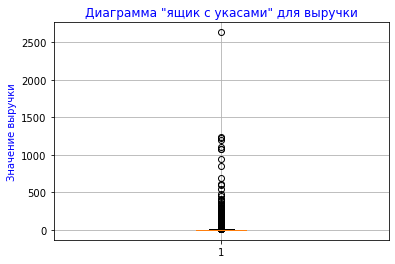

In [25]:
plt.boxplot(orders['revenue']) 
plt.title('Диаграмма "ящик с укасами" для выручки', fontsize=12, color='blue')
plt.ylabel('Значение выручки', fontsize=10, color='blue')
plt.grid()
plt.show()

Видим, что 75 процентов значений выручки меньше  4.89, при этом максимальное значение очень большое и составляет 2633.28, очевидно, это выброс, посмотрим на эту запись

In [26]:
orders[orders['revenue'] > 1500] #<фильт по столцу revenue со значением больше 1500>

,buy_ts,revenue,uid
23244,2017-12-10 20:17:00,2633.28,5539673724080479777


Не будем пока удалять данную запись, оставим как есть, при необходимости вернемся к этому вопросу при анализе

В таблице costs Изменим тип данных столбца dt с object на datetime

In [27]:
costs['dt'] = pd.to_datetime(costs['dt'])#<изменение типа данных на datetime>

In [28]:
costs.info()#<проверим, что тип данных изменился>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [29]:
costs['costs'].describe()#<вывод статистических показателей методом describe>

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

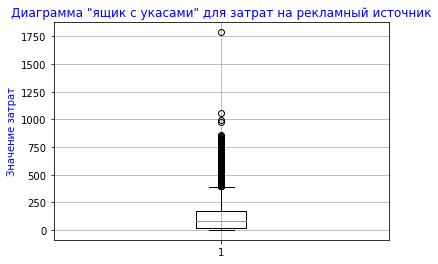

In [30]:
plt.boxplot(costs['costs']) 
plt.title('Диаграмма "ящик с укасами" для затрат на рекламный источник', fontsize=12, color='blue')
plt.ylabel('Значение затрат', fontsize=10, color='blue')
plt.grid()
plt.show()

In [31]:
costs[costs['costs'] > 1000]

,source_id,dt,costs
902,3,2017-11-24,1788.28
919,3,2017-12-11,1061.18


Аналогично данным по выручке,  у затрат 75 процентов значений выручки меньше  170 при этом максимальное значение подозриительно очень большое и составляет 1788.28

Выполним проверку таблиц на дубликаты

In [32]:
print('количество дубликатов в таблице visits_new:',visits_new.duplicated().sum())
print('количество дубликатов в таблице orders:',orders.duplicated().sum())
print('количество дубликатов в таблице costs:',costs.duplicated().sum())

количество дубликатов в таблице visits_new: 0
количество дубликатов в таблице orders: 0
количество дубликатов в таблице costs: 0


Дубликаты отсуствуют

## Вывод

Провели предобработку данных, откоррективали названия столбцов, привели их в рабочий вид - убрали лишние пробелы, болььшие буквы. Изменили типы данных столбцов содержащих даты с object на datetime. Таже в процессе предобработки в таблице visits были выявлены 2 записи с нелогичной информацией, когда сессия началась позднее чем закончилась, сложно предопложить почему так, возможно некоррекно выгружены данные или в этом момент был сбой. В любом случае эти две записи удалили, чтобы они не повлияли на дальнейшие расчеты и анализ. По столбцам revenue и costs таблиц orders и costs соответственно были выявлены подозрительно большие значения, удалять их не стали, учтем эти данные в дальнейшем анализе. 

## 3. Исследовательский анализ

### 3.1 Оценка пользовательской активности<a id="2"> </a>

Изучим данные пользовательской активности приложения Яндекс.Афиши. Чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату.

In [33]:
visits_new['session_year']  = visits_new['session_start_ts'].dt.year
visits_new['session_month'] = visits_new['session_start_ts'].dt.month
visits_new['session_week']  = visits_new['session_start_ts'].dt.week
visits_new['session_date'] = visits_new['session_start_ts'].dt.date
display(visits_new.head()) 

,index,device,session_end_ts,source_id,session_start_ts,uid,delta_session,session_year,session_month,session_week,session_date
0,0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,00:18:00,2017,12,51,2017-12-20
1,1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,00:28:00,2018,2,8,2018-02-19
2,2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,00:00:00,2017,7,26,2017-07-01
3,3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,00:24:00,2018,5,20,2018-05-20
4,4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,00:00:00,2017,12,52,2017-12-27


Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее:

In [34]:
dau_total = visits_new.groupby('session_date').agg({'uid': 'nunique'}).mean()#<группировка по уникальным пользователям и расчет среднего значения за день>
wau_total = visits_new.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()#<группировка по уникальным пользователям и расчет среднего значения за неделю>
mau_total = visits_new.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()#<группировка по уникальным пользователям и расчет среднего значения за месяц>
print('число активных пользователей за день', int(dau_total))
print('число активных пользователей за неделю', int(wau_total)) 
print('число активных пользователей за месяц', int(mau_total))

число активных пользователей за день 907
число активных пользователей за неделю 5716
число активных пользователей за месяц 23228


Отразим на графике динамику ежемесячного числа активных уникальных пользователей 

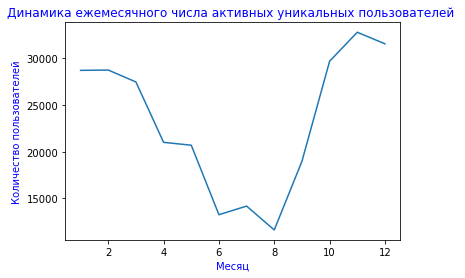

In [35]:
visits_new.groupby(['session_month'])['uid'].nunique().plot()
plt.title('Динамика ежемесячного числа активных уникальных пользователей ', fontsize=12, color='blue')
plt.xlabel('Месяц', fontsize=10, color='blue')
plt.ylabel('Количество пользователей', fontsize=10, color='blue')
plt.show()

По графику можно сказать, что в летние месяцы меньше активных уникальных пользователей приложения, их число возрастает к концу года, можно выделить некую сезонность.

Рассчитаем метрику Sticky Factor - показатель лояльности аудитории к приложению, чтобы узнать частоту и регулярность использования приложения в течение недели и месяца. 

In [36]:
sticky_mau = dau_total/mau_total *100
sticky_wau = dau_total/wau_total *100
print(sticky_mau)
print(sticky_wau)


uid    3.90897
dtype: float64
uid    15.884409
dtype: float64


3,9% пользователей (из тех что пользовались им за месяц) заходили в приложение ежедневно, не очень высокий показатель, и 15,8% пользователей (из тех, что были активны за неделю) пользовались им ежедневно.

### 3.2 Оценка пользовательских сессий<a id="3"> </a>

Узнаем сколько сессий приходится на одного пользователя за день. Это хороший показатель регулярности использования приложения. Чтобы найти эту метрику  — разделим число сессий на количество пользователей за период:

In [37]:
sessions_per_user = visits_new.groupby(['session_year', 'session_month', 'session_date', 'device']).agg({'uid': ['count','nunique']})#<группировка по году, месяцу и дню сессии с подсчетом количества сессии по уникальным пользователям>
sessions_per_user.columns = ['n_sessions', 'n_users'] #<переименуем столбцы>
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users'] #<подсчет количества сессии на пользователя в день>
display(sessions_per_user) 

n_sessions  n_users  \
session_year session_month session_date device                         
2017         6             2017-06-01   desktop         501      455   
                                        touch           163      153   
                           2017-06-02   desktop         498      458   
                                        touch           160      152   
                           2017-06-03   desktop         329      307   
...                                                     ...      ...   
2018         5             2018-05-29   touch           284      263   
                           2018-05-30   desktop         989      904   
                                        touch           421      393   
                           2018-05-31   desktop        1544     1361   
                                        touch           712      655   

                                                 sessions_per_user  
session_year session_month session_date device                      
2017         6             2017-06-01   desktop           1.101099  
                                        touch             1.065359  
                           2017-06-02   desktop           1.087336  
                                        touch             1.052632  
                           2017-06-03   desktop           1.071661  
...                                                            ...  
2018         5             2018-05-29   touch             1.079848  
                           2018-05-30   desktop           1.094027  
                                        touch             1.071247  
                           2018-05-31   desktop           1.134460  
                                        touch             1.087023  

[727 rows x 3 columns]

Ежедневно один пользователь проводит в среднем одну сессию, отлично! Рассчитаем среднюю продолжительность сессии или ASL, чтобы понять сколько длится сессия пользователя в среднем. Длина всех сессий у нас уже посчитана в столбце delta_session, найдем среднее в секундах

In [38]:
visits_new['delta_session'] = visits_new['delta_session'].dt.seconds #<переведем значения в секунды>
print('Средняя продолжительность сессии или ASL', visits_new['delta_session'].mean())#<рассчитаем среднее и выведем на экран> 


Средняя продолжительность сессии или ASL 643.0422873805642


Среднее посчитали, но посмотрим распределение, можно ли среднее счать оптимальным в нашем случае

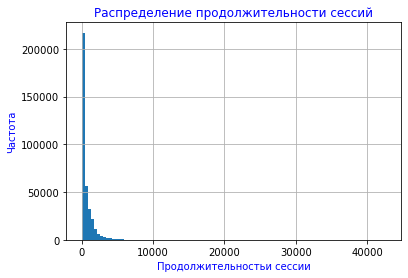

In [39]:
visits_new['delta_session'].hist(bins=100) 
plt.title('Распределение продолжительности сессий', fontsize=12, color='blue')
plt.xlabel('Продолжительностьи сессии', fontsize=10, color='blue')
plt.ylabel('Частота', fontsize=10, color='blue')
plt.show()

Распределение нельзя назвать нормальным, оно имеет очень высокий пик, и при этом не очень длинный хвост, поэтому необходимо рассчитать моду, она меньше будет искажать представление о данных и точнее опишет выборку

In [40]:
print(visits_new['delta_session'].mode()) 

0    60
dtype: int64


Получилось 60 секунд, чаще всего одна сессия длится минуту, не очень много пользователи проводят времени в приложении, чтобы понять хорошо это или нет, нужно посмотреть успевают ли пользователи совершить покупки за это время.

Посмотрим различается ли средняя продолжительность сессии на разных устройствах, сделаем два среза

In [41]:
visits_new_desktop = visits_new.query('device == "desktop"')#срез по условию что устройство desktop
visits_new_touch = visits_new.query('device == "touch"')#срез по условию что устройство touch

In [42]:
print('ASL на устройствах desktop', visits_new_desktop['delta_session'].mean())
print('ASL на устройствах touch', visits_new_touch['delta_session'].mean())

ASL на устройствах desktop 703.3120408279855
ASL на устройствах touch 479.6194066072517


Получается, что с устройст desktop пользователи проводят больше времени в приложении чем с touch, может быть интерфейс вэб приложение более дружелюбный. Также это может быть связано с возрастной категорией пользователей. Посмотрим гистограммы распреледения продолжительности сессий с этих устройств

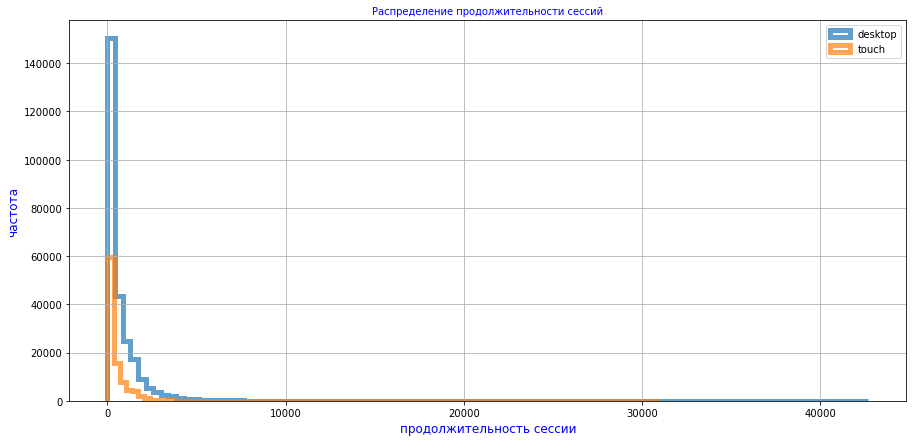

In [43]:
ax = visits_new_desktop.plot(kind='hist', y='delta_session', histtype='step', range=(0, 42700), bins=100, linewidth=5, alpha=0.7, label='desktop')
visits_new_touch.plot(kind='hist', y='delta_session', histtype='step', range=(0, 31000), bins=90, linewidth=5, alpha=0.7, label='touch', ax=ax, grid=True, legend=True, figsize=(15,7))
plt.title('Распределение продолжительности сессий', fontsize=10, color='blue')
plt.xlabel('продолжительность сессии', fontsize=12, color='blue')
plt.ylabel('частота', fontsize=12, color='blue')
plt.show()

По гистограммам видно, что максимальная продолжительность на desktop устройствах гораздо больше, и в принципе с них чаще пользователи заходят в приложение. Также, посчитаем моду, поскольку она точнее охарактеризует наши распределения

In [44]:
print('на устройствах desktop', visits_new_desktop['delta_session'].mode())
print('на устройствах touch', visits_new_touch['delta_session'].mode()) 


на устройствах desktop 0    60
dtype: int64
на устройствах touch 0    60
dtype: int64


Значение моды получилось одинаковым - 60 секунд

In [45]:
visits_new_desktop['delta_session'].describe()

count    262565.000000
mean        703.312041
std        1067.030043
min           0.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       42660.000000
Name: delta_session, dtype: float64

In [46]:
visits_new_touch['delta_session'].describe()

count    96833.000000
mean       479.619407
std        752.531533
min          0.000000
25%         60.000000
50%        180.000000
75%        600.000000
max      30840.000000
Name: delta_session, dtype: float64

Значение моды получилось одинаковым - 60 секунд, но при этом 75% выборки по устройству desktop проводят менее 1,5 минут на странице и 75% выборки по устройству touch проводят менее минуты, все таки вэб приложение вероятно больше нравится пользователям.

Посмотрим на продолжительность сессии в разрезе рекламных источников, для этого сделаем сводные таблицы в разере источников и времени с указанием средней продолжительности сессии, и отобразим это на графике

In [47]:
visits_source = visits_new.pivot_table(index = ['session_date', 'session_month'], columns = 'source_id', values = 'delta_session', aggfunc = 'mean') \
                             .reset_index()
visits_source = visits_source.groupby(['session_month']).agg({'session_date': 'first', 1 : 'mean', 2 : 'mean', 3: 'mean', 4: 'mean', 5: 'mean', 6: 'mean', 7: 'mean', 9: 'mean', 10: 'mean',}) \
.sort_values(by = 'session_date', ascending = True)


In [48]:
display(visits_source)

,session_date,1,2,3,4,5,6,7,9,10
session_month,,,,,,,,,,
6,2017-06-01,958.993972,825.602575,500.131496,515.005112,486.892343,NaN,150.0,409.523192,625.451966
7,2017-07-01,1129.288826,835.179997,491.684146,501.147628,487.765851,360.0,420.0,511.988346,551.344761
8,2017-08-01,1084.120863,777.120371,500.097484,486.558644,483.358146,180.0,5280.0,542.091221,449.303065
9,2017-09-01,919.027799,783.683313,520.346712,534.957623,490.424714,0.0,885.0,678.312214,577.099976
10,2017-10-01,947.862761,762.600313,558.434778,568.266041,511.034883,NaN,264.0,638.669733,558.558003
11,2017-11-01,1093.030650,842.150388,603.794637,605.928411,534.693274,480.0,300.0,659.221136,677.443890
12,2017-12-01,1049.238979,872.395593,626.939919,623.640033,569.034554,1260.0,742.5,642.341414,601.739877
1,2018-01-01,1000.478927,901.300335,584.277605,552.211780,557.876444,5940.0,420.0,518.493530,807.939041
2,2018-02-01,1037.977321,870.593051,556.782689,552.882180,542.813251,NaN,132.0,573.922931,684.405850


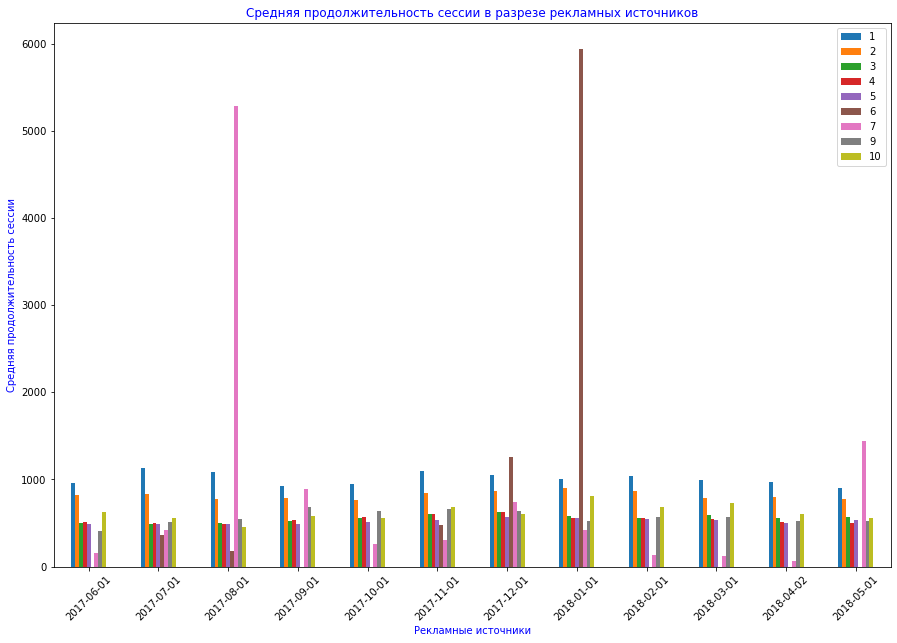

In [49]:
visits_source.plot(x='session_date', y=[1, 2, 3, 4, 5,6, 7, 9, 10], kind="bar", figsize=(15,10))
plt.title('Средняя продолжительность сессии в разрезе рекламных источников', fontsize=12, color='blue')
plt.xlabel('Рекламные источники', fontsize=10, color='blue')
plt.ylabel('Средняя продолжительность сессии', fontsize=10, color='blue')
pl.xticks(rotation = 45)
plt.show()

Самые стабильные источники под номерами 1 и 2 (что бы это ни значило, отсутсвует расшифровка номеров), присутствуют всплески по источникам 7 в августе 2017 и по номеру 6 в январе 2018, возможно были какие-то массовые рекламные компании, что способствовало такому росту длины сессии, но пользователи вообще перестали приходить из источника 6 и по источнику 7 тоже показатели после всплеска были низкими.

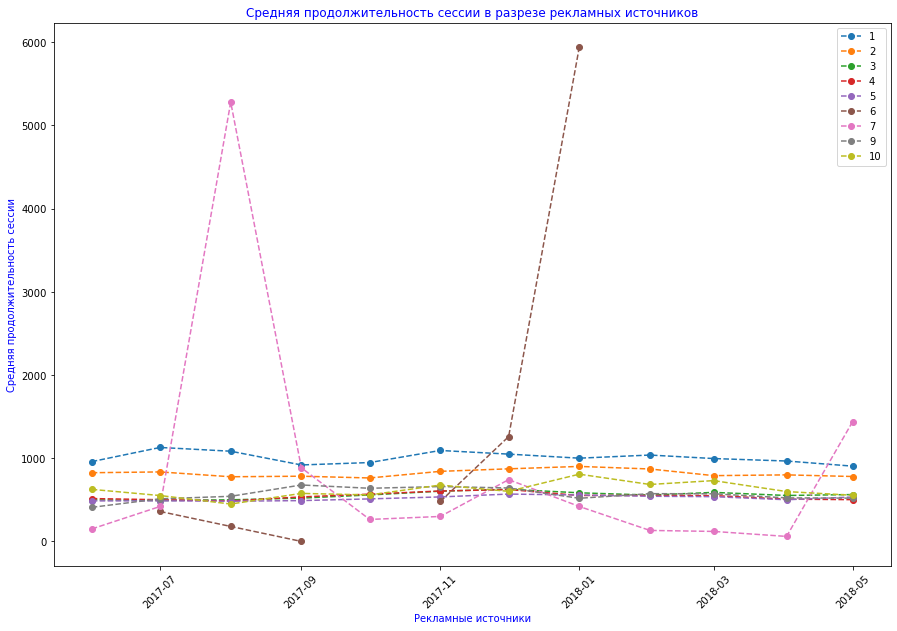

In [50]:
visits_source.plot(x='session_date', y=[1, 2, 3, 4, 5,6, 7, 9, 10], figsize=(15,10), marker="o", linestyle='--')
plt.title('Средняя продолжительность сессии в разрезе рекламных источников', fontsize=12, color='blue')
plt.xlabel('Рекламные источники', fontsize=10, color='blue')
plt.ylabel('Средняя продолжительность сессии', fontsize=10, color='blue')
pl.xticks(rotation = 45)
plt.show()

### 3.3 Рассчет коэффициента удержания<a id="4"> </a>

Возьмём дату, когда пользователь впервые проявил активность в приложении. Эти данные запишем в объект Series first_activity_date. Объединим его с исходным датафреймом visits_new:

In [51]:
visits_new['session_start_ts'] = pd.to_datetime(visits_new['session_start_ts'])
first_activity_date = visits_new.groupby(['uid'])['session_start_ts'].min()#<находим дату первой активности в разрезе пользователей>
first_activity_date.name = 'first_activity_date'
visits_new = visits_new.join(first_activity_date,on='uid')#<присоединяем дату первой активности в исходную таблицу по столбцу uid> 

Следующим шагом выделим из столбцов first_activity_date и session_start_ts месяцы. Вызовем метод astype(): преобразуем значения столбцов к типу 'datetime64[M]'. [M] в типе datetime64 означает размерность временной метки, в этом случае — месяц:

In [52]:
visits_new['first_activity_month'] = visits_new['first_activity_date'].astype('datetime64[M]')
visits_new['session_month_new'] = visits_new['session_start_ts'].astype('datetime64[M]')
display(visits_new.head(10)) 

,index,device,session_end_ts,source_id,session_start_ts,uid,delta_session,session_year,session_month,session_week,session_date,first_activity_date,first_activity_month,session_month_new
0,0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017,12,51,2017-12-20,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018,2,8,2018-02-19,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017,7,26,2017-07-01,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018,5,20,2018-05-20,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017,12,52,2017-12-27,2017-12-27 14:06:00,2017-12-01,2017-12-01
5,5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,60,2017,9,35,2017-09-03,2017-09-03 21:35:00,2017-09-01,2017-09-01
6,6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,3360,2018,1,5,2018-01-30,2017-06-29 09:00:00,2017-06-01,2018-01-01
7,7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,60,2017,11,44,2017-11-05,2017-11-05 15:14:00,2017-11-01,2017-11-01
8,8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,180,2017,7,29,2017-07-19,2017-07-19 10:41:00,2017-07-01,2017-07-01
9,9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,60,2017,11,45,2017-11-08,2017-11-08 13:42:00,2017-11-01,2017-11-01


Сгруппируем данные по столбцу first_activity_month и оценим показатели каждой когорты.

In [53]:
cohort_grouped = visits_new.groupby('first_activity_month').agg({'uid':'nunique'})
display(cohort_grouped) 

,uid
first_activity_month,
2017-06-01,13259
2017-07-01,13140
2017-08-01,10181
2017-09-01,16704
2017-10-01,25977
2017-11-01,27248
2017-12-01,25268
2018-01-01,22624
2018-02-01,22197


Сначала число активных пользователей нарастает доходит своего пика в ноябре 2017, а затем начинает снижаться. Посмотрим как меняетсяч количество активных пользователей с течением времени в каждой когорте

In [54]:
visits_new.pivot_table(index='first_activity_month', columns='session_month_new', values='uid', aggfunc='nunique') 

session_month_new,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_activity_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,NaN,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
2017-08-01,NaN,NaN,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
2017-09-01,NaN,NaN,NaN,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
2017-10-01,NaN,NaN,NaN,NaN,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
2017-11-01,NaN,NaN,NaN,NaN,NaN,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,25268.0,1410.0,960.0,786.0,512.0,481.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22624.0,1351.0,890.0,565.0,458.0
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22197.0,1267.0,565.0,446.0


После первого месяца количество покупателей в когорте снижается. В некоторых когортах число покупателей периодически начинает расти. Например в когортах 2017-06-01	и 2017-07-01. Начиная с декабря 2017 во всех когортах количество активных пользователей уменьшается.

 Теперь для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты.

In [55]:
visits_new['cohort_lifetime'] = visits_new['session_month_new'] - visits_new['first_activity_month']
visits_new['cohort_lifetime'] = visits_new['cohort_lifetime'] / np.timedelta64(1,'M')
#visits_new['cohort_lifetime'] = visits_new['cohort_lifetime'].astype('int')
visits_new['cohort_lifetime'] = visits_new['cohort_lifetime'].round()

Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:

In [56]:
cohorts = visits_new.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
display(cohorts)

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0.0,13259
1,2017-06-01,1.0,1043
2,2017-06-01,2.0,713
3,2017-06-01,3.0,814
4,2017-06-01,4.0,909
...,...,...,...
73,2018-03-01,1.0,861
74,2018-03-01,2.0,557
75,2018-04-01,0.0,15709
76,2018-04-01,1.0,760


Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждый следующий месяц. Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц:

In [57]:
initial_visits_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]


Переименуем столбец uid в cohort_users методом rename(). Параметру columns передадим словарь, где ключ — старое название столбца, а значение — новое:

In [58]:
initial_visits_count = initial_visits_count.rename(columns={'uid':'cohort_users'}) 

Объединим данные по когортам с исходным количеством пользователей в когорте:

In [59]:
cohorts = cohorts.merge(initial_visits_count,on='first_activity_month') 
cohorts.head(15)

,first_activity_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0.0,13259,13259
1,2017-06-01,1.0,1043,13259
2,2017-06-01,2.0,713,13259
3,2017-06-01,3.0,814,13259
4,2017-06-01,4.0,909,13259
5,2017-06-01,5.0,947,13259
6,2017-06-01,6.0,809,13259
7,2017-06-01,7.0,766,13259
8,2017-06-01,8.0,694,13259
9,2017-06-01,9.0,674,13259


Наконец, рассчитаем Retention Rate. Разделим количество активных пользователей в каждый из месяцев на исходное число пользователей в когорте:

In [60]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
cohorts

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0.0,13259,13259,1.000000
1,2017-06-01,1.0,1043,13259,0.078664
2,2017-06-01,2.0,713,13259,0.053775
3,2017-06-01,3.0,814,13259,0.061392
4,2017-06-01,4.0,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1.0,861,20589,0.041818
74,2018-03-01,2.0,557,20589,0.027053
75,2018-04-01,0.0,15709,15709,1.000000
76,2018-04-01,1.0,760,15709,0.048380


Построим сводную таблицу и создадим тепловую карту:

In [61]:
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot.drop([0], axis='columns', inplace=True)
display(retention_pivot)

cohort_lifetime,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_activity_month,,,,,,,,,,,
2017-06-01,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


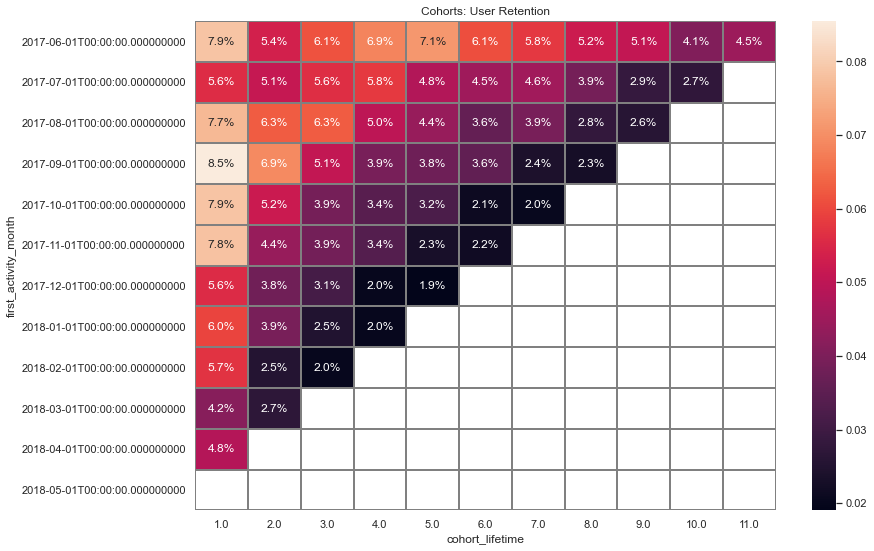

In [62]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

В первый месяц высокий коэффциент удержания держится вплоть у всех когород до ноябрьской, а у сентябрьской когорты, составляет рекордные 8,5%, у всех последующих когорт коэффциент удержания в первый месяц начинает все больше и больше снижать, т.е. в 2018 году поведение пользователей меняется, это свидительствуюет о изменение маркетинговой политики в не очень удачную сторону. То же самое происходит с данным коэффициентом во все последующие месяцы - с течением времени он снижается для всех когорт



### 3.4 Анализ поведения пользователей<a id="5"> </a>

Попробуем оценить Retention Rate пользователей которые в первый месяц совершили хотя бы одну покупку и тех пользователей, котрые в первый месяц совершили более одной покупки


По каждому пользователю выделим дату совершения первой покупки и добавим её к датафрейму orders:

In [63]:
min_event_buy_ts = orders.groupby(['uid'])['buy_ts'].min()
min_event_buy_ts.name = 'min_event_buy_ts'
orders =  orders.join(min_event_buy_ts,on='uid') 

Создадим новый столбец time_to_buy, содержащий время между покупкой и первой покупкой пользователя:

In [64]:
orders['time_to_buy'] = orders['buy_ts'] - orders['min_event_buy_ts'] 

Создадим срез filtered_buy, в котором оставим отметки о времени, зафиксированные менее, чем через 30 дней после первой покупки.

In [65]:
filtered_buy = orders[(orders['time_to_buy'] < '30 days')]
display(filtered_buy)

,buy_ts,revenue,uid,min_event_buy_ts,time_to_buy
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,0 days
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,0 days
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,0 days
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,0 days
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,0 days
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,0 days
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,0 days
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,0 days
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,0 days


Создадим датафрейм count_buy_by_users, где для каждого клиента из среза filtered_buy посчитаем количество отметок.

In [66]:
count_buy_by_users = filtered_buy.groupby(['uid']).agg({'buy_ts':'count'}).reset_index() 

Предположим что целевое поведение пользователя более 1 раза за месяц совершить покупку в нашем приложении

In [67]:
count_buy_by_users['is_target_behavior'] = count_buy_by_users['buy_ts'] > 1

In [68]:
display(count_buy_by_users)

,uid,buy_ts,is_target_behavior
0,313578113262317,1,False
1,1575281904278712,2,True
2,2429014661409475,1,False
3,2464366381792757,1,False
4,2551852515556206,2,True
...,...,...,...
36518,18445147675727495770,1,False
36519,18445407535914413204,3,True
36520,18445601152732270159,1,False
36521,18446156210226471712,1,False


Сформируем списки пользователей с целевым поведением (с количеством покупок более 1 в месяц) и с нецелевым поведением

In [69]:
user_ids_with_target_behavior = count_buy_by_users[count_buy_by_users['is_target_behavior']]['uid'].unique()
user_ids_without_target_behavior = count_buy_by_users[~count_buy_by_users['is_target_behavior']]['uid'].unique()

В основном датафрейме разделим пользователей на 2 группы:
Пользователи, которые совершили покупку более 1 раза — их примем за целевых пользователей поведенческой когорты;
Пользователи, которые совершили покупку 1 раз;


In [70]:
orders.loc[orders['uid'].isin(user_ids_with_target_behavior), 'is_in_behavioral_cohort'] = 'yes'
orders.loc[orders['uid'].isin(user_ids_without_target_behavior), 'is_in_behavioral_cohort'] = 'no'
display(orders.head(10))

,buy_ts,revenue,uid,min_event_buy_ts,time_to_buy,is_in_behavioral_cohort
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,0 days,no
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,0 days,no
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,0 days,no
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,0 days,no
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,0 days,no
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01 08:43:00,0 days,no
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01 08:54:00,0 days,yes
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00,0 days,yes
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01 09:22:00,0 days,no
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01 09:23:00,0 days,no


In [71]:
print(orders.groupby('is_in_behavioral_cohort')['uid'].nunique())

is_in_behavioral_cohort
no     32235
yes     4288
Name: uid, dtype: int64


Проанализируем, как для каждой поведенческой когорты изменяется Retention Rate с течением времени. Выделим месячные когорты и подсчитаем относительную неделю lifetime пользователя в приложении:

In [72]:

orders['first_buy_month'] =orders['min_event_buy_ts'].astype('datetime64[M]')
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['cohort_lifetime'] = orders['buy_month'] - orders['first_buy_month']
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1,'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round()

In [73]:
def printRetentionRate(df):
    cohorts = df.groupby(['first_buy_month','cohort_lifetime'],as_index=False).agg({'uid':'nunique'}).sort_values(['first_buy_month','cohort_lifetime'])
    inital_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_buy_month','uid']]
    inital_users_count = inital_users_count.rename(columns={'uid':'cohort_users'})

    cohorts = cohorts.merge(inital_users_count,on='first_buy_month')

    cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']


    print (cohorts.groupby(['cohort_lifetime'])['retention'].mean())
    cohorts.groupby(['cohort_lifetime'])['retention'].mean().plot.bar() 


Вызовем функцию printRetentionRate(), чтобы вывести данные о среднем Retention Rate по lifetime среди пользователей, попавших в поведенческую когорту клиентов. То есть тех, сделал покупку более 1 раза в первые 30 дней.

cohort_lifetime
0.0     1.000000
1.0     0.225114
2.0     0.064861
3.0     0.054804
4.0     0.058243
5.0     0.049910
6.0     0.045325
7.0     0.053093
8.0     0.051665
9.0     0.042789
10.0    0.060107
11.0    0.076923
Name: retention, dtype: float64


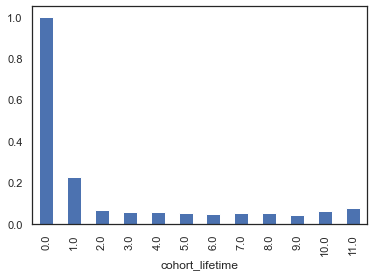

In [74]:
printRetentionRate(orders[orders['is_in_behavioral_cohort'] == 'yes'])

cohort_lifetime
0.0     1.000000
1.0     0.011155
2.0     0.021568
3.0     0.019228
4.0     0.018009
5.0     0.016264
6.0     0.017116
7.0     0.016601
8.0     0.015789
9.0     0.015338
10.0    0.011818
11.0    0.018718
Name: retention, dtype: float64


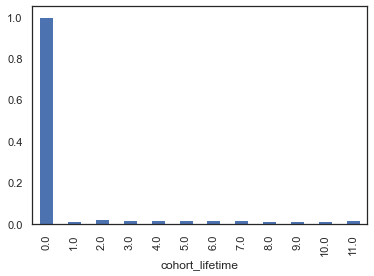

In [75]:
printRetentionRate(orders[orders['is_in_behavioral_cohort'] == 'no'])

Очевидно, что у пользователей, которые в первый месяц использования совершили больше одной покупки на Яндекс.Афишах коэффициент удержания гораздо выше чем у пользователей cовершивших одну покупку. Вероятно пользователи используют приложение больше в информационных целях, стоит задуматься почему, может быть не очень удобен сервис оплаты, или же не устраивает размер сервисного сбора.

Сделаем срез из таблицы по дате покупки за первые полгода выбоки т.е. с 01.06.2017 по 01.12.2017 и посчитаем среднее количество покупок на 1 клиента


In [76]:
orders['year_of_by']  = orders['buy_ts'].dt.year
orders['month_of_by'] = orders['buy_ts'].dt.month
orders_first_six_months = orders[(orders['year_of_by'] == 2017)]
orders_first_six_months = orders_first_six_months[orders_first_six_months['month_of_by'] < 12]

In [77]:
number_purch_per_person = len(orders_first_six_months['buy_ts']) / orders_first_six_months['uid'].nunique()
print('Среднее число покупок на одного клиента за первые 6 месяцев выборки',number_purch_per_person)

Среднее число покупок на одного клиента за первые 6 месяцев выборки 1.3021816399068513


### 3.5 Расчет среднего чека<a id="6"> </a>

Соединим таблицы visits и orders

In [78]:
visits_orders = orders.set_index(['uid']).join(visits_new.groupby(['uid']).agg({'device':'first', 'source_id': 'first'})).reset_index()
display(visits_orders)

,uid,buy_ts,revenue,min_event_buy_ts,time_to_buy,is_in_behavioral_cohort,first_buy_month,buy_month,cohort_lifetime,year_of_by,month_of_by,device,source_id
0,9223707061355654945,2017-10-31 22:56:00,4.64,2017-10-31 22:56:00,0 days 00:00:00,no,2017-10-01,2017-10-01,0.0,2017,10,touch,9
1,9224005701666002943,2017-12-26 11:15:00,3.36,2017-12-26 11:15:00,0 days 00:00:00,no,2017-12-01,2017-12-01,0.0,2017,12,desktop,5
2,9224005701666002943,2018-03-16 17:11:00,3.67,2017-12-26 11:15:00,80 days 05:56:00,no,2017-12-01,2018-03-01,3.0,2018,3,desktop,5
3,9225406053864431006,2017-12-28 16:29:00,0.43,2017-12-28 16:29:00,0 days 00:00:00,no,2017-12-01,2017-12-01,0.0,2017,12,desktop,4
4,9225479525411867039,2018-02-25 16:54:00,7.33,2018-02-25 16:54:00,0 days 00:00:00,no,2018-02-01,2018-02-01,0.0,2018,2,touch,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50410,9221059331469344216,2017-12-18 17:12:00,0.98,2017-12-18 17:12:00,0 days 00:00:00,no,2017-12-01,2017-12-01,0.0,2017,12,desktop,4
50411,9221809908447127809,2017-12-31 18:29:00,1.34,2017-12-31 18:29:00,0 days 00:00:00,no,2017-12-01,2017-12-01,0.0,2017,12,desktop,4
50412,9222179515197516675,2018-02-01 12:19:00,2.20,2018-02-01 12:19:00,0 days 00:00:00,no,2018-02-01,2018-02-01,0.0,2018,2,desktop,3
50413,9222413955005962633,2018-02-10 22:40:00,1.04,2018-02-10 22:40:00,0 days 00:00:00,no,2018-02-01,2018-02-01,0.0,2018,2,touch,1


In [79]:
visits_orders['revenue'].sum() / len(visits_orders['revenue'])

4.999646930477041

Сперва сгруппируем данные по когорте first_buy_month и месяцу совершения заказа buy_month:

In [80]:
orders_grouped_by_cohorts = visits_orders.groupby(['first_buy_month','buy_month']).agg({'revenue':'sum','uid':'nunique'})
display(orders_grouped_by_cohorts.head(15)) 

revenue   uid
first_buy_month buy_month                 
2017-06-01      2017-06-01   9557.49  2023
                2017-07-01    981.82    61
                2017-08-01    885.34    50
                2017-09-01   1931.30    54
                2017-10-01   2068.58    88
                2017-11-01   1487.92    67
                2017-12-01   1922.74    62
                2018-01-01   1176.56    47
                2018-02-01   1119.15    58
                2018-03-01   1225.51    45
                2018-04-01   1155.66    45
                2018-05-01    519.62    53
2017-07-01      2017-07-01  11557.65  1923
                2017-08-01    644.61    52
                2017-09-01   1199.05    57

Найдём средний чек покупателя revenue_per_user — разделим показатель revenue на uid:

In [81]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts

revenue   uid  revenue_per_user
first_buy_month buy_month                                   
2017-06-01      2017-06-01   9557.49  2023          4.724414
                2017-07-01    981.82    61         16.095410
                2017-08-01    885.34    50         17.706800
                2017-09-01   1931.30    54         35.764815
                2017-10-01   2068.58    88         23.506591
...                              ...   ...               ...
2018-03-01      2018-05-01   1114.87    58         19.221897
2018-04-01      2018-04-01  10600.69  2276          4.657597
                2018-05-01   1209.92    69         17.535072
2018-05-01      2018-05-01  13925.76  2988          4.660562
2018-06-01      2018-06-01      3.42     1          3.420000

[79 rows x 3 columns]

Посмотрим на гистограмму распределения среднего чека

In [82]:
orders_grouped_by_cohorts['revenue_per_user'].describe()

count     79.000000
mean      14.733568
std       16.764783
min        3.420000
25%        6.862373
50%       11.044651
75%       18.464348
max      138.669189
Name: revenue_per_user, dtype: float64

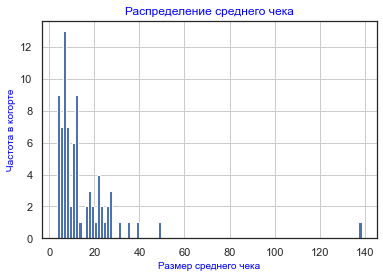

In [83]:

orders_grouped_by_cohorts['revenue_per_user'].hist(bins=100) 
plt.title('Распределение среднего чека', fontsize=12, color='blue')
plt.xlabel('Размер среднего чека', fontsize=10, color='blue')
plt.ylabel('Частота в когорте', fontsize=10, color='blue')
plt.show()

In [84]:
orders_grouped_by_cohorts.query('revenue_per_user >100') #посмотрим на экстремальное значение среднего чека

,,revenue,uid,revenue_per_user
first_buy_month,buy_month,,,
2017-09-01,2017-12-01,10261.52,74,138.669189


У нас есть одно выбивающееся значение среднего чека равное 138,67, выкинем это значение, чтобы мы могли правильнее оценить средний размер чека в целом по выборке

In [85]:
orders_grouped_by_cohorts_new = orders_grouped_by_cohorts.query('revenue_per_user < 100')
orders_grouped_by_cohorts_new['revenue_per_user'].describe()

count    78.000000
mean     13.144649
std       9.092282
min       3.420000
25%       6.824478
50%      10.915372
75%      17.663868
max      48.135052
Name: revenue_per_user, dtype: float64

In [86]:
visits_orders['revenue'].sum() / len(visits_orders['revenue'])

4.999646930477041

Построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки и оценим, как изменяется средний чек с течением времени:

In [87]:
orders_grouped_by_cohorts.pivot_table(index='first_buy_month',columns='buy_month',values='revenue_per_user',aggfunc='mean')

buy_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_buy_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139062,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


Практически у всех когорт к маю 2018 увеличивается средний чек по сравнению с началом периода, очень хороший показатель среднего чека у декабрьской когорты 2017 года, также хорошо по размеру среднего чека показала сеся сентябрьская когорта 2017 года, у когорот 2018 года размер среднего чего меньше чем у корорт 2017.

Попробуем оценить как изменяется средний чек в зависимости от времени, прошедшего с момента первой покупки

In [88]:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['first_buy_month'] =orders_grouped_by_cohorts['first_buy_month'].astype('datetime64[M]')
orders_grouped_by_cohorts['buy_month'] = orders_grouped_by_cohorts['buy_month'].astype('datetime64[M]')
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['buy_month'] - orders_grouped_by_cohorts['first_buy_month']
orders_grouped_by_cohorts['cohort_lifetime'].head() 

0     0 days
1    30 days
2    61 days
3    92 days
4   122 days
Name: cohort_lifetime, dtype: timedelta64[ns]

Преобразуем полученные данные в  число месяцев, прошедших между датами. Для этого cohort_lifetime нужно разделить на константу np.timedelta64(1, 'M')

In [89]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].astype('int64')

In [90]:
print(orders_grouped_by_cohorts['cohort_lifetime'].head()) 

0    0
1    0
2    2
3    3
4    4
Name: cohort_lifetime, dtype: int64


Оставим в данных о месяце первого заказа только год и месяц:

In [91]:
orders_grouped_by_cohorts['first_buy_month'] = orders_grouped_by_cohorts['first_buy_month'].dt.strftime('%Y-%m') 

Построим сводную таблицу изменения среднего чека, где в столбцах будет lifetime, а строках — когорты:

In [92]:
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_buy_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean')
display(revenue_per_user_pivot) 


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10
first_buy_month,,,,,,,,,,,
2017-06,10.409912,NaN,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,23.264623,25.681333,9.804151
2017-07,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,7.187482,NaN,12.187832,NaN
2017-08,5.276518,11.148793,11.851321,12.182955,16.921250,12.139062,11.115394,21.070000,8.307419,NaN,NaN
2017-09,13.916457,NaN,76.057195,NaN,19.881538,26.766061,16.961351,11.044651,NaN,NaN,NaN
2017-10,5.003733,11.287427,6.753252,7.413152,7.163967,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11,6.246868,NaN,6.786583,9.983972,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,7.816575,43.750535,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,10.543385,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,6.383494,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видно, в каких когортах средний чек пользователей возрастает на следующий месяц после месяца первой покупки. А в некоторых когортах средний чек растёт с течением времени. Например, в когорте июль 2017 и март 2018.

Посмотрим как различается средний чек в зависимости от типа устройства, сгруппируем по девайсу

In [93]:
orders_grouped_by_device = visits_orders.groupby(['first_buy_month','buy_month', 'device']).agg({'revenue':'sum','uid':'nunique'})


In [94]:
orders_grouped_by_device['revenue_per_user'] = orders_grouped_by_device['revenue'] / orders_grouped_by_device['uid'] 


Посчитаем средний чек для устройств desktop и touch

In [95]:
orders_grouped_by_device.groupby(by=['device']).sum()

,revenue,uid,revenue_per_user
device,,,
desktop,211531.81,32985,1254.629252
touch,40525.39,8034,581.360878


В результате получаем, что средний чек по пользователям с устройством desktop примерно в два раза больше, чем у пользователей с устройством touch, пользователи вэб приложений мало того что больше времени проводят в приложении, но и к тому же совершают покупки на более крупные суммы.

In [96]:
orders_grouped_by_device

revenue   uid  revenue_per_user
first_buy_month buy_month  device                                   
2017-06-01      2017-06-01 desktop   8172.04  1676          4.875919
                           touch     1385.45   347          3.992651
                2017-07-01 desktop    852.30    49         17.393878
                           touch      129.52    12         10.793333
                2017-08-01 desktop    835.84    43         19.438140
...                                      ...   ...               ...
2018-04-01      2018-05-01 desktop   1160.48    58         20.008276
                           touch       49.44    11          4.494545
2018-05-01      2018-05-01 desktop  11341.69  2364          4.797669
                           touch     2584.07   624          4.141138
2018-06-01      2018-06-01 desktop      3.42     1          3.420000

[157 rows x 3 columns]

In [97]:
orders_grouped_by_device_pivot = orders_grouped_by_device.pivot_table(index = 'buy_month', columns = 'device', values = 'revenue_per_user', aggfunc='mean').reset_index()
orders_grouped_by_device_pivot


device,buy_month,desktop,touch
0,2017-06-01,4.875919,3.992651
1,2017-07-01,11.673315,8.506185
2,2017-08-01,12.985384,6.397395
3,2017-09-01,19.471219,6.307250
4,2017-10-01,14.626698,14.328924
5,2017-11-01,11.991356,9.396698
6,2017-12-01,33.977166,4.344817
7,2018-01-01,11.856409,4.468598
8,2018-02-01,17.067745,4.004704
9,2018-03-01,17.589760,8.215862


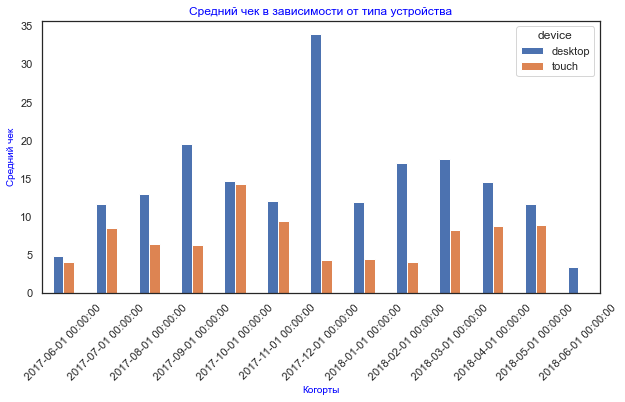

In [98]:
orders_grouped_by_device_pivot.plot(x='buy_month', y=['desktop','touch'], kind="bar", figsize=(10,5))
plt.title('Средний чек в зависимости от типа устройства', fontsize=12, color='blue')
plt.xlabel('Когорты', fontsize=10, color='blue')
plt.ylabel('Средний чек', fontsize=10, color='blue')
pl.xticks(rotation = 45)
plt.show()

По графику видно, наскольк средний чек по устройствам desktop выше, чем по touch, в декабре 2017 года срений чек просто зашкаливает, но это связано с одним очень крупным значением, которое было выявлено на стадии предобработки по одному пользователю, это сильно повлияло на средний чек в этом месяце, может быть пользователь покупал много билетов за раз на какое-то мероприятие для своих сотрудников к примеру . Есть месчц октябрь 2017 когда средние чеки по этим двум видам устройств были примерно одинаковы, может быть в это период проводилась большая рекламная компания.

Посмотрим на средний чек, в зависимости от рекламного источника. Для этого определим первый источник каждого заказа

In [99]:
visits_by_sourse = visits_new.sort_values(by='session_start_ts').groupby(['uid'])['source_id'].first()
visits_by_sourse.name = 'first_source'
visits_new = visits_new.join(visits_by_sourse, on = 'uid')
orders_by_sourse = orders.join(visits_by_sourse, on = 'uid')
display(orders_by_sourse)

,buy_ts,revenue,uid,min_event_buy_ts,time_to_buy,is_in_behavioral_cohort,first_buy_month,buy_month,cohort_lifetime,year_of_by,month_of_by,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,0 days,no,2017-06-01,2017-06-01,0.0,2017,6,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,0 days,no,2017-06-01,2017-06-01,0.0,2017,6,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,0 days,no,2017-06-01,2017-06-01,0.0,2017,6,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,0 days,no,2017-06-01,2017-06-01,0.0,2017,6,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,0 days,no,2017-06-01,2017-06-01,0.0,2017,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,0 days,no,2018-05-01,2018-05-01,0.0,2018,5,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,0 days,no,2018-05-01,2018-05-01,0.0,2018,5,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,0 days,no,2018-05-01,2018-05-01,0.0,2018,5,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,0 days,no,2018-05-01,2018-05-01,0.0,2018,5,3


Cгруппируем данные по когорте first_buy_month, месяцу совершения заказа buy_month и рекламному источнику

In [100]:
orders_grouped_by_cohorts_source = orders_by_sourse.groupby(['first_buy_month','buy_month', 'first_source']).agg({'revenue':'sum','uid':'nunique'}).reset_index()
display(orders_grouped_by_cohorts_source.head(15)) 

,first_buy_month,buy_month,first_source,revenue,uid
0,2017-06-01,2017-06-01,1,1378.70,190
1,2017-06-01,2017-06-01,2,1043.68,235
2,2017-06-01,2017-06-01,3,2804.34,638
3,2017-06-01,2017-06-01,4,1959.84,413
4,2017-06-01,2017-06-01,5,1898.89,384
5,2017-06-01,2017-06-01,9,242.69,68
6,2017-06-01,2017-06-01,10,229.35,95
7,2017-06-01,2017-07-01,1,414.98,16
8,2017-06-01,2017-07-01,2,115.54,8
9,2017-06-01,2017-07-01,3,71.97,13


Найдём средний чек покупателя revenue_per_user — разделим показатель revenue на uid

In [101]:
orders_grouped_by_cohorts_source['rev_per_user_by_source'] = orders_grouped_by_cohorts_source['revenue'] / orders_grouped_by_cohorts_source['uid'] 

Построим сводную таблицу изменения среднего чека в когортах в зависимости от рекламного источника и оценим, как изменяется средний чек с течением времени:

In [102]:
orders_grouped_by_cohorts_source_pivot = orders_grouped_by_cohorts_source.pivot_table(index='first_buy_month',columns='first_source',values='rev_per_user_by_source',aggfunc='mean')
orders_grouped_by_cohorts_source_pivot

first_source,1,2,3,4,5,7,9,10
first_buy_month,,,,,,,,
2017-06-01,41.489423,19.072746,6.724400,28.226574,26.066398,NaN,5.414772,2.931404
2017-07-01,34.221001,8.275214,5.232577,5.187832,9.225090,NaN,3.612587,2.110343
2017-08-01,27.015767,6.192461,5.355572,5.748318,26.175116,1.22,3.381858,3.766459
2017-09-01,15.208430,32.480111,7.182837,16.034818,88.374252,NaN,13.995051,2.352962
2017-10-01,13.018954,12.427951,5.379485,5.176769,7.221526,NaN,7.685458,2.876089
2017-11-01,12.204361,13.692728,3.605752,9.218092,5.790017,NaN,3.045457,3.022685
2017-12-01,6.791142,133.409459,5.573709,4.868901,3.281020,NaN,3.677664,6.763647
2018-01-01,14.604498,15.472331,5.032512,4.140833,10.654550,NaN,2.519517,3.406341
2018-02-01,11.686755,10.611410,6.488422,3.058641,3.487009,NaN,3.632278,1.938580


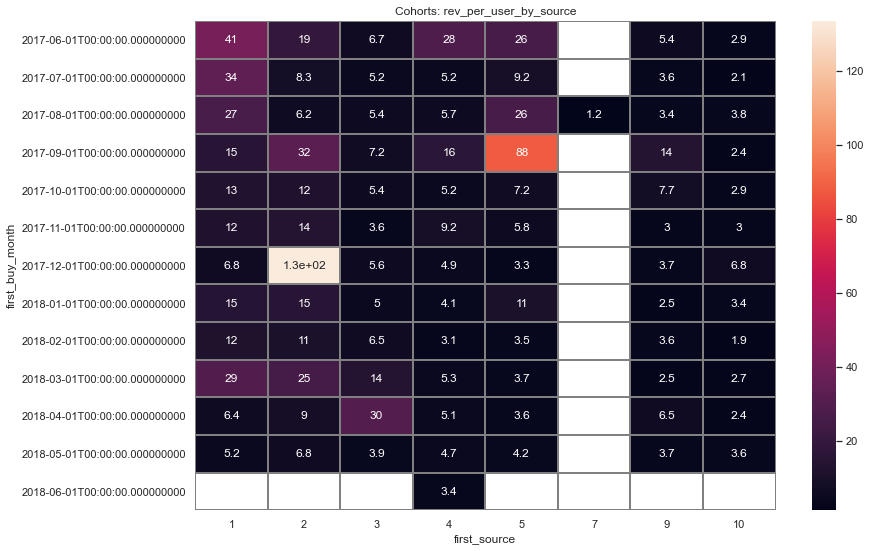

In [103]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: rev_per_user_by_source')
sns.heatmap(orders_grouped_by_cohorts_source_pivot, annot=True, linewidths=1, linecolor='gray'); 

Мы видим, что у источников под номерами 1  и 2 стабильно хорошие показатели среднего чека для всех когорт, также выделяется источники 4  и 5, у них периодически получаются очень хорошие показатели среднего чека, самые низкие средние чеки у покупателей пришедших из источников 9 и 10

### 3.6 Расчет LTV<a id="7"> </a>

Возмем таблицу с группировкой по месячным когортам с указанием общей выручки

In [104]:
display(orders_grouped_by_cohorts)

,first_buy_month,buy_month,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06,2017-06-01,9557.49,2023,4.724414,0
1,2017-06,2017-07-01,981.82,61,16.095410,0
2,2017-06,2017-08-01,885.34,50,17.706800,2
3,2017-06,2017-09-01,1931.30,54,35.764815,3
4,2017-06,2017-10-01,2068.58,88,23.506591,4
...,...,...,...,...,...,...
74,2018-03,2018-05-01,1114.87,58,19.221897,2
75,2018-04,2018-04-01,10600.69,2276,4.657597,0
76,2018-04,2018-05-01,1209.92,69,17.535072,0
77,2018-05,2018-05-01,13925.76,2988,4.660562,0


Видим, к примеру, что когорта 0, т.е пользователи, сделавшие свой первый заказ в юине 2017, в этом же месяце принесли выручки на сумму 9557,49. С точки зрения когортного анализа LTV — накопительная выручка когорты в пересчёте на количество людей. У нас уже есть информация о первой дате покупки каждого пользователя, содержится в таблице visits_orders, посчитаем количество новых покупателей n_buyers за каждый месяц

In [105]:
cohort_sizes = visits_orders.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_buy_month', 'n_buyers']
display(cohort_sizes.head()) 

,first_buy_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [106]:
cohort_sizes['first_buy_month'] = cohort_sizes['first_buy_month'].dt.strftime('%Y-%m') 

Добавим в таблицу orders_grouped_by_cohorts  данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [107]:
report = pd.merge(cohort_sizes, orders_grouped_by_cohorts, on='first_buy_month')
#report['first_buy_month'] = report['first_buy_month'].dt.strftime('%Y-%m') 
display(report) 


,first_buy_month,n_buyers,buy_month,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06,2023,2017-06-01,9557.49,2023,4.724414,0
1,2017-06,2023,2017-07-01,981.82,61,16.095410,0
2,2017-06,2023,2017-08-01,885.34,50,17.706800,2
3,2017-06,2023,2017-09-01,1931.30,54,35.764815,3
4,2017-06,2023,2017-10-01,2068.58,88,23.506591,4
...,...,...,...,...,...,...,...
74,2018-03,3533,2018-05-01,1114.87,58,19.221897,2
75,2018-04,2276,2018-04-01,10600.69,2276,4.657597,0
76,2018-04,2276,2018-05-01,1209.92,69,17.535072,0
77,2018-05,2988,2018-05-01,13925.76,2988,4.660562,0


Ранее в таблице появился столбец с новыми покупателями — n_buyers. В первых 12 строках его значение не изменяется — ведь это продажи одной и той же когорты. LTV считают не из выручки, а из валовой прибыли, в проекте примем маржинальность как 1.  LTV — относительный показатель. Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.

In [108]:
report['first_buy_month'] = report['first_buy_month'].astype('datetime64[M]')
report['age'] = (report['buy_month'] - report['first_buy_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
display(report) 

,first_buy_month,n_buyers,buy_month,revenue,uid,revenue_per_user,cohort_lifetime,age
0,2017-06-01,2023,2017-06-01,9557.49,2023,4.724414,0,0
1,2017-06-01,2023,2017-07-01,981.82,61,16.095410,0,1
2,2017-06-01,2023,2017-08-01,885.34,50,17.706800,2,2
3,2017-06-01,2023,2017-09-01,1931.30,54,35.764815,3,3
4,2017-06-01,2023,2017-10-01,2068.58,88,23.506591,4,4
...,...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,58,19.221897,2,2
75,2018-04-01,2276,2018-04-01,10600.69,2276,4.657597,0,0
76,2018-04-01,2276,2018-05-01,1209.92,69,17.535072,0,1
77,2018-05-01,2988,2018-05-01,13925.76,2988,4.660562,0,0


Наконец, найдём LTV. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы:

In [109]:
report['ltv'] = report['revenue'] / report['n_buyers']


In [110]:
output = report.pivot_table(
        index='first_buy_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')
    
display(output.round(2).fillna(''))


age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


Построим тепловую карту кумулятивного LTV

In [111]:
output_ltv_cum=output.cumsum(axis=1).round(2)


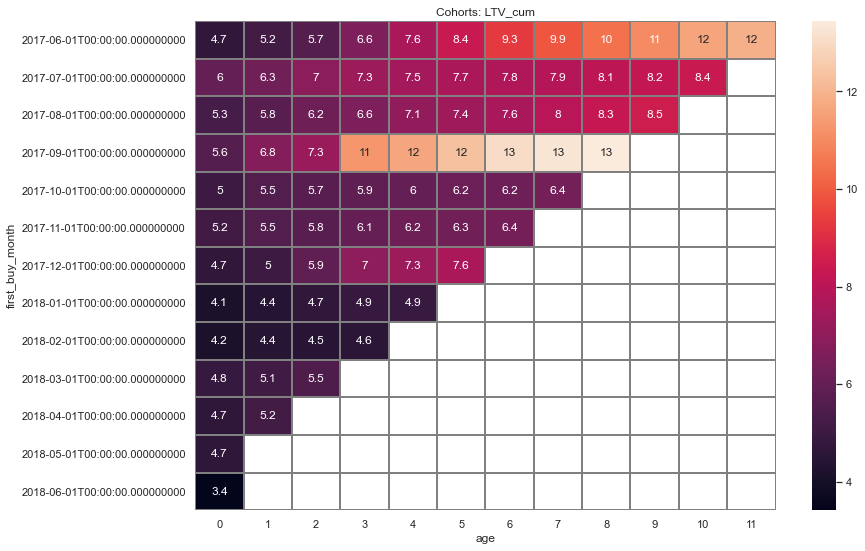

In [112]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV_cum')
sns.heatmap(output_ltv_cum, annot=True, linewidths=1, linecolor='gray'); 

Посчитаем итоговый LTV первой когорты. Сложим их LTV по месяцам:

In [113]:
ltv_201706 = output.loc['2017-06-01'].sum()
print(ltv_201706) 

11.879233811171506


In [114]:
output.loc['2017-07-01'].sum()

8.386853874154957

В среднем каждый покупатель из первой когорты принес по 11.87 выручки за 11 месяцев «жизни».

Теперь посчитаем Средний LTV за 6 месяцев после первой покупки

In [115]:
m6_cum_ltv = output.cumsum(axis=1).mean(axis=0)[5]
m6_cum_ltv

7.96905263020733

Чтобы вложения окупались, привлечение одного покупателя не должно превышать 7,97 

### 3.7 Анализ расходов<a id="8"> </a>

Посмотрим таблицу с расходами

In [116]:
display(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [117]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

Посчитаем помесячные расходы

In [118]:
costs['dt'] = costs['dt'].astype('datetime64[M]') 
monthly_costs = costs.groupby('dt').sum().reset_index()
monthly_costs_new = costs.groupby(['dt','source_id']).sum().reset_index()


In [119]:
display(monthly_costs.head(20))

,dt,source_id,costs
0,2017-06-01,1020,18015.00
1,2017-07-01,1054,18240.59
2,2017-08-01,1054,14790.54
3,2017-09-01,1020,24368.91
4,2017-10-01,1054,36322.88
5,2017-11-01,1020,37907.88
6,2017-12-01,1054,38315.35
7,2018-01-01,1054,33518.52
8,2018-02-01,952,32723.03
9,2018-03-01,1025,30415.27


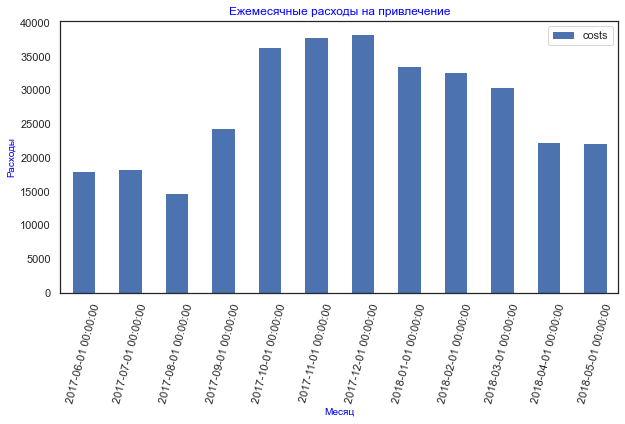

In [120]:
monthly_costs.plot(x='dt', y='costs', kind="bar", figsize=(10,5))
plt.title('Ежемесячные расходы на привлечение', fontsize=12, color='blue')
plt.xlabel('Месяц', fontsize=10, color='blue')
plt.ylabel('Расходы', fontsize=10, color='blue')
pl.xticks(rotation = 75)
plt.show()

In [121]:
print('Общая сумма расходов составляет', sum(monthly_costs['costs']))#подсчет общей суммы расходов

Общая сумма расходов составляет 329131.61999999994


In [122]:
monthly_costs_new.pivot_table(index='source_id', values = 'costs', aggfunc='sum').sort_values('costs')


,costs
source_id,
9,5517.49
10,5822.49
1,20833.27
2,42806.04
5,51757.10
4,61073.60
3,141321.63


Общая сумма расходов составила 329131.619. Расходы начали расти с сентября 2017, максимума достигли в декабре 2017, затем стали снижаться. Меньше всего затрат на источник 9, а больше всего на источник 3. Как мы помним, самые стабильные по длительности сессии были у пользователей с источниками  1 и 2, на них соответственно затраты были 20833,27 и 423806,04. Интересен факт, что были всплески по длительности сессии у источников 6 и 7, в то время как, затрат по данным источникам за исследуюемый период вовсе не было.


Добавим помесячные расходы в когортный отчет и посчитаем САС и ROI

In [123]:
report_new = pd.merge(report, monthly_costs, left_on='first_buy_month', right_on='dt')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['roi'] = report_new['ltv'] / report_new['cac']

In [124]:
report_new

,first_buy_month,n_buyers,buy_month,revenue,uid,revenue_per_user,cohort_lifetime,age,ltv,dt,source_id,costs,cac,roi
0,2017-06-01,2023,2017-06-01,9557.49,2023,4.724414,0,0,4.724414,2017-06-01,1020,18015.00,8.905091,0.530530
1,2017-06-01,2023,2017-07-01,981.82,61,16.095410,0,1,0.485329,2017-06-01,1020,18015.00,8.905091,0.054500
2,2017-06-01,2023,2017-08-01,885.34,50,17.706800,2,2,0.437637,2017-06-01,1020,18015.00,8.905091,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,54,35.764815,3,3,0.954671,2017-06-01,1020,18015.00,8.905091,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,88,23.506591,4,4,1.022531,2017-06-01,1020,18015.00,8.905091,0.114825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,90,11.811667,1,1,0.300892,2018-03-01,1025,30415.27,8.608907,0.034951
74,2018-03-01,3533,2018-05-01,1114.87,58,19.221897,2,2,0.315559,2018-03-01,1025,30415.27,8.608907,0.036655
75,2018-04-01,2276,2018-04-01,10600.69,2276,4.657597,0,0,4.657597,2018-04-01,986,22289.38,9.793225,0.475594
76,2018-04-01,2276,2018-05-01,1209.92,69,17.535072,0,1,0.531599,2018-04-01,986,22289.38,9.793225,0.054282


Посчитаем CAC когорты 201706. Поделим расходы за этот месяц на количество людей в когорте:

In [125]:
# отфильруем нужную когорту
cohort_201706 = report_new[report_new['first_buy_month'] == '2017-06-01']

# посчитаем расходы за этот месяц
costs_201706 = cohort_201706['costs'][0]

n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706 = output.loc['2017-06-01'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706) 

CAC = 8.905091448344047
LTV = 11.879233811171506


Привлечение одного покупателя в среднем обошлось компании в 8.9. Валовая прибыль с каждого из них: 11.88. То есть вложения в привлечение покупателей окупились, и у компании остались деньги на прочие расходы.

Посчитаем накопительный ROMI, вызовем метод cumsum()

In [126]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output_romi = report_new.pivot_table(
        index='first_buy_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output_romi_cum = output_romi.cumsum(axis=1).round(2)
output_romi_cum

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


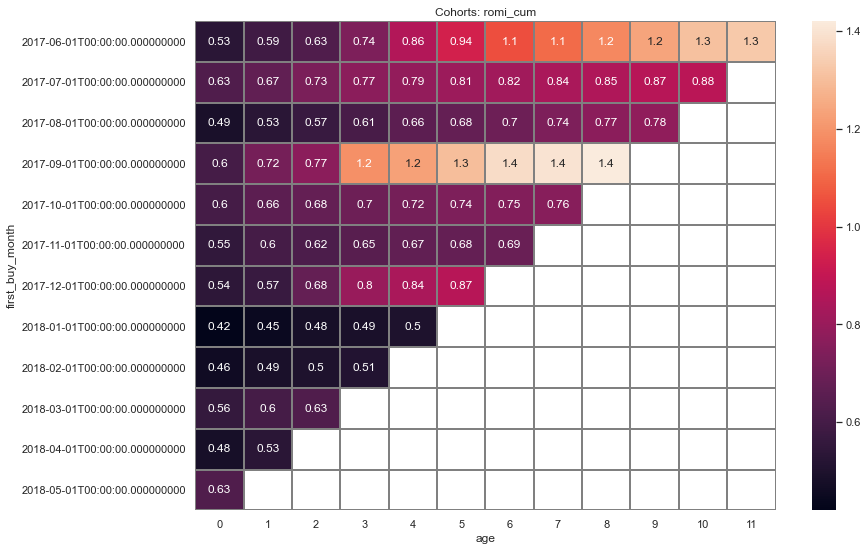

In [127]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: romi_cum')
sns.heatmap(output_romi_cum, annot=True, linewidths=1, linecolor='gray'); 

Июньская когорта окупилась на 6 месяц(ROMI = 1,05), сентябрьская  на третий месяц(ROMI = 1,19), больше никакие когорты не окупились, явно нужно что-то менять маркетологам.

Теперь посчитаем Средний ROMI за 6 месяцев после первой покупки по всем когортам

In [128]:
m6_cum_romi = output_romi.cumsum(axis=1).mean(axis=0)[5]
m6_cum_romi

0.8598760895593314

Результат не радует, за 6 месяцев затраты на привлечение покупателей не окупились

Посмотрим сколько стоило привлечение одного покупателя из каждого источника. Мы уже определяли первый источник каждого заказа, поэтому посчитаем затраты

In [129]:
orders_grouped_by_sourse = orders_by_sourse.groupby('first_source').agg({'uid': 'count'})
costs_grouped_by_sourse = costs.groupby('source_id').agg({'costs': 'sum'})

Добавим стоимость привлечения

In [130]:
costs_by_user = orders_grouped_by_sourse.merge(costs_grouped_by_sourse, left_index=True, right_index=True)
costs_by_user['cac'] = costs_by_user['costs'] / costs_by_user['uid']

In [131]:
costs_by_user

,uid,costs,cac
1,5223,20833.27,3.988756
2,6392,42806.04,6.696815
3,13289,141321.63,10.634482
4,12895,61073.60,4.736223
5,9406,51757.10,5.502562
9,1647,5517.49,3.350024
10,1562,5822.49,3.727586


Дороже всего выходит привлечение 1 клиента из источника 3, надо сказать в этот источник вкладывают больше всего финансов и привлекает, он больше всего пользователей. Дешевле всего стоит привлечение клиента из источника 9, но как мы помним и средний чек у таких покупателей самы низкий. Хочется отметить рекламные источники под номерами 4 и 5, у них стоимость привлечения составляет 4,73 и 5,50 соответственно, что в два раза меньше чем у самого догорого источника, но при этом через них приходит очень много покупателей, да и к тому же у них стабильно хороший средний чек для всех когорт, а у неготорых кокогот проскакивают даже высокие показатели среднего чека, к примеру для сентябрьской когорты 20174 года 16 для источника 4 и 88 для источника 5. Вероятно, именно на эти рекламные источники и нужно делать ставки отделу маркетинга. По источнику 3 также стабилен хороший средний чек, но при этом привлечение стоит в 2 раза дороже, стоит перенести финансирование на 4 и 5.


## Итого

В данной главе произвели анализ пользовательской активности, рассчеты показателей количества и длины сессии, среднего чека, коэффициента удержания, LTV, ROI, анализ расходов. Показатели рассматривались в разрезе когорт, маркетиновых источников и девайсов пользователей.

# Общий вывод и рекомендации<a id="9"> </a>

        Была проанализирована пользовательская активность, выявлено, ежемесячно число новых активных пользователей составляет 23228, при чем можно выделить сезонность  - в конце и начале года количество пользователей расте, тогда как в летние месяцы их меньше. 3,9% пользователей (из тех что пользовались им за месяц) заходили в приложение ежедневно, не очень высокий показатель, и 15,8% пользователей (из тех, что были активны за неделю) пользовались им ежедневно. Ежедневно один пользователь проводит в среднем одну сессию, отлично! 3,9% пользователей (из тех что пользовались им за месяц) заходили в приложение ежедневно, не очень высокий показатель, и 15,8% пользователей (из тех, что были активны за неделю) пользовались им ежедневно. Несмотря на то что мода продолжительности сессии для разных девайсов одинакова, 75% выборки по устройству desktop проводят менее 1,5 минут на странице и 75% выборки по устройству touch проводят менее минуты, все таки вэб приложение вероятно больше нравится пользователям, может быть интерфейс вэб приложение более дружелюбный. Также это может быть связано с возрастной категорией пользователей.
        Число активных пользователей нарастает доходит своего пика в ноябре 2017, а затем начинает снижаться, для всех категорий пользователей. Интересный момент, что у пользователей впервые пришедших в приложение в июле 2017 максимальное значение коэффициента удержания среди остальных когорт (10,2%) и появилось оно в сентябре 2017, эта когорта в целом отличается наиболее высоким коэффициентом удержания, пользователи из этой когорты чаще возвращались в приложение по сравнению с остальными, вероятно летом 2017 была какая-то рекламная компания, или может быть промокоды, которые подсадили пользователей. К тому же у пользователей этой июльской когорты очень хороший средний чек, в целом вообще когорты 2017 года имеют более высокий средний чек, чем когорты 2018.
        Очевидно, что у пользователей, которые в первый месяц использования совершили больше одной покупки на Яндекс.Афишах коэффициент удержания гораздо выше чем у пользователей cовершивших одну покупку. Вероятно пользователи используют приложение больше в информационных целях, стоит задуматься почему, может быть не очень удобен сервис оплаты, или же не устраивает размер сервисного сбора.
        Интересен показатель, что средний чек по пользователям с устройством desktop примерно в два раза больше, чем у пользователей с устройством touch, пользователи вэб приложений мало того что больше времени проводят в приложении, но и к тому же совершают покупки на более крупные суммы. Если смотреть на средний чек в разрезе маркетинговых источников, то видим, что у номеров 1  и 2 стабильно хорошие показатели для всех когорт, также выделяется источники 4  и 5, у них периодически получаются очень хорошие показатели среднего чека, самые низкие средние чеки у покупателей пришедших из источников 9 и 10
        Общая сумма расходов составила 329131.619. Расходы начали расти с сентября 2017, максимума достигли в декабре 2017, затем стали снижаться. Меньше всего затрат на источник 9, а больше всего на источник 3. Как мы помним, самые стабильные по длительности сессии были у пользователей с источниками  1 и 2, на них соответственно затраты были 20833,27 и 423806,04. Интересен факт, что были всплески по длительности сессии у источников 6 и 7, в то время как, затрат по данным источникам за исследуемый период вовсе не было. Анализ показал, чтобы вложения окупались, привлечение одного покупателя не должно превышать 7,97, а показатель окупаемости за 6 месяцев составил 0,86. Результат не радует, за 6 месяцев затраты на привлечение покупателей не окупились.
        Дороже всего выходит привлечение 1 клиента из источника 3, надо сказать в этот источник вкладывают больше всего финансов и привлекает, он больше всего пользователей. Дешевле всего стоит привлечение клиента из источника 9, но как мы помним и средний чек у таких покупателей самы низкий. Хочется отметить рекламные источники под номерами 4 и 5, у них стоимость привлечения составляет 4,73 и 5,50 соответственно, что в два раза меньше чем у самого догорого источника, но при этом через них приходит очень много покупателей, да и к тому же у них стабильно хороший средний чек для всех когорт, а у неготорых кокогот проскакивают даже высокие показатели среднего чека, к примеру для сентябрьской когорты 20174 года 16 для источника 4 и 88 для источника 5. Вероятно, именно на эти рекламные источники и нужно делать ставки отделу маркетинга. По источнику 3 также стабилен хороший средний чек, но при этом привлечение стоит в 2 раза дороже, стоит перенести финансирование на 4 и 5.
        Рекомендации по оптимизации маркенговых расходов:
    - принятие мер на привлечение клиентов с устройствами desktop через источники 4 и 5, сокращение расходов на привлечение через канал 1
    - совместно с разработчиками выяснение недоработок в сервисе заказа для приложения ориентированного на touch устройства, возможно выявятся баги в процессе заказа или отображения страниц, из-за которого пользователи могут отваливаться
    В работе были использованы рассчеты метрик отражающих пользовательскую активность (dau, wau, mau), анализ количества и продолжительности пользовательских сессии, рассчет среднего чека, LTV и ROI. Данные анализировались с помощью когортного анализа, с учетом разных девайсов, маркетинговых источников и временных интервалов. Были применены методы построенния сводных таблиц(pivot_table), группировок (groupby), сортировка(sort_values), операции с индексами (reset_index), выделение из дат месяца, года и дня, рассчет кумулятивной суммы (cumsum), визуализация (heatmap, plot), изменение типов данных (astype), переименование столбцов (rename).